# **ALL Header File**

In [ ]:
import re
import csv
import sys
import pandas as pd
import numpy as np
from re import sub
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## **Merge All Json File in CSV Format**

In [ ]:
# Read the JSON file
df1 = pd.read_json('/content/drive/MyDrive/Author Gender Prediction/amir.json')
df2 = pd.read_json('/content/drive/MyDrive/Author Gender Prediction/robin.json')


# Normalize the specific column if it contains nested JSON data
normalized_df1 = pd.json_normalize(df1["books"])
normalized_df2 = pd.json_normalize(df2["books"])

data = [normalized_df1, normalized_df2]

combined_df = pd.concat(data)

combined_df.shape

# Convert the combined DataFrame to CSV
combined_df.to_csv('/content/drive/MyDrive/Author Gender Prediction/dataset.csv', index=False)

##**Data Pre-Processing**

**Remove English Text**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Author Gender Prediction/dataset.csv')
def remove_english(text):
	out = re.compile('[a-zA-Z0-9]+', flags=re.I) #remove english
	text=out.sub(r'', text)

	return text

df["cleaned_text"] = df['book_text'].apply(lambda x: remove_english(str(x)))

csv_file = '/content/drive/MyDrive/Author Gender Prediction/dataset.csv'

# Read the existing CSV file into a pandas DataFrame
existing_data = pd.read_csv(csv_file)

# Generate the new column as a pandas Series or list
new_column_data = df["cleaned_text"]  # Replace with your actual new column data

# Add the new column to the existing DataFrame
existing_data['remove_english'] = new_column_data

# Write the modified DataFrame back to the CSV file
existing_data.to_csv(csv_file, index=False)

**Select 4000,3000,2000 words Contain Full Sentence**

In [ ]:
#4000 Word Segment
word_length = 4000
df = pd.read_csv('/content/drive/MyDrive/Author Gender Prediction/dataset.csv')

def get_middle_max_4000_word(input_string):
    # Split the input string into a list of sentences
    sentences = re.split(r'(?<=[।!?])\s+', input_string)

    # Initialize variables
    middle_index = len(sentences) // 2
    num_words = 0
    extracted_sentences = []

    # Find the middle maximum 4000 words containing complete sentences
    while num_words < word_length and middle_index >= 0 and middle_index < len(sentences):
        words = sentences[middle_index].split()
        if num_words + len(words) <= word_length:
            num_words += len(words)
            extracted_sentences.append(sentences[middle_index])
        middle_index -= 1

    # Join the extracted sentences into a string
    output_string = ' '.join(extracted_sentences)

    return output_string

df["cleaned_text"] = df['remove_english'].apply(lambda x: get_middle_max_4000_word(str(x)))

csv_file = '/content/drive/MyDrive/Author Gender Prediction/dataset.csv'

# Read the existing CSV file into a pandas DataFrame
existing_data = pd.read_csv(csv_file)

# Generate the new column as a pandas Series or list
new_column_data = df["cleaned_text"]  # Replace with your actual new column data

# Add the new column to the existing DataFrame
existing_data['pre_processed_data_1'] = new_column_data

# Write the modified DataFrame back to the CSV file
existing_data.to_csv(csv_file, index=False)

In [ ]:
#3000 Word Segment
word_length = 3000
df = pd.read_csv('/content/drive/MyDrive/Author Gender Prediction/dataset.csv')

def get_middle_max_4000_word(input_string):
    # Split the input string into a list of sentences
    sentences = re.split(r'(?<=[।!?])\s+', input_string)

    # Initialize variables
    middle_index = len(sentences) // 2
    num_words = 0
    extracted_sentences = []

    # Find the middle maximum 4000 words containing complete sentences
    while num_words < word_length and middle_index >= 0 and middle_index < len(sentences):
        words = sentences[middle_index].split()
        if num_words + len(words) <= word_length:
            num_words += len(words)
            extracted_sentences.append(sentences[middle_index])
        middle_index -= 1

    # Join the extracted sentences into a string
    output_string = ' '.join(extracted_sentences)

    return output_string

df["cleaned_text"] = df['pre_processed_data_1'].apply(lambda x: get_middle_max_4000_word(str(x)))

csv_file = '/content/drive/MyDrive/Author Gender Prediction/dataset.csv'

# Read the existing CSV file into a pandas DataFrame
existing_data = pd.read_csv(csv_file)

# Generate the new column as a pandas Series or list
new_column_data = df["cleaned_text"]  # Replace with your actual new column data

# Add the new column to the existing DataFrame
existing_data['pre_processed_data_2'] = new_column_data

# Write the modified DataFrame back to the CSV file
existing_data.to_csv(csv_file, index=False)

In [ ]:
#2000 Word Segment
word_length = 2000
df = pd.read_csv('/content/drive/MyDrive/Author Gender Prediction/dataset.csv')

def get_middle_max_4000_word(input_string):
    # Split the input string into a list of sentences
    sentences = re.split(r'(?<=[।!?])\s+', input_string)

    # Initialize variables
    middle_index = len(sentences) // 2
    num_words = 0
    extracted_sentences = []

    # Find the middle maximum 4000 words containing complete sentences
    while num_words < word_length and middle_index >= 0 and middle_index < len(sentences):
        words = sentences[middle_index].split()
        if num_words + len(words) <= word_length:
            num_words += len(words)
            extracted_sentences.append(sentences[middle_index])
        middle_index -= 1

    # Join the extracted sentences into a string
    output_string = ' '.join(extracted_sentences)

    return output_string

df["cleaned_text"] = df['pre_processed_data_2'].apply(lambda x: get_middle_max_4000_word(str(x)))

csv_file = '/content/drive/MyDrive/Author Gender Prediction/dataset.csv'

# Read the existing CSV file into a pandas DataFrame
existing_data = pd.read_csv(csv_file)

# Generate the new column as a pandas Series or list
new_column_data = df["cleaned_text"]  # Replace with your actual new column data

# Add the new column to the existing DataFrame
existing_data['pre_processed_data_3'] = new_column_data

# Write the modified DataFrame back to the CSV file
existing_data.to_csv(csv_file, index=False)

In [ ]:
# Set options to display all columns and rows
pd.set_option("display.max_columns", None)  # Display all columns
pd.set_option("display.max_rows", None)     # Display all rows

# Load your DataFrame
data = pd.read_csv('/content/drive/MyDrive/Author Gender Prediction/dataset.csv')

# Display the full DataFrame
print(data)


**Remove Unnecessary Column And Row**

In [ ]:
input_file = '/content/drive/MyDrive/Author Gender Prediction/dataset.csv'
output_file = '/content/drive/MyDrive/Author Gender Prediction/dataset.csv'
columns_to_remove = ['who', 'id', 'birth', 'birth_place', 'death', 'death_place', 'publisher', 'publish_date', 'genre', 'book_abstract', 'book_text', 'remove_english']  # List the column names you want to remove

# Read the CSV file into a pandas DataFrame
data = pd.read_csv(input_file)

# Remove the specified columns from the DataFrame
data = data.drop(columns=columns_to_remove)

# Write the modified DataFrame to a new CSV file
data.to_csv(output_file, index=False)

# Specify the column name and value to match for deletion
column_name = 'author'
value_to_match = 'dummy'

# Delete rows based on the specified criteria
data = data[data[column_name] != value_to_match]

# Save the modified DataFrame to a new file or overwrite the existing one
data.to_csv('/content/drive/MyDrive/Author Gender Prediction/dataset.csv', index=False)

## **Feature Extraction**

**Take Some Pronoun Frequency Each Row**

In [ ]:
# Set a larger field size limit
csv.field_size_limit(sys.maxsize)

csv_file = '/content/drive/MyDrive/Author Gender Prediction/dataset.csv'

with open(csv_file, mode='r', encoding='utf-8', newline='') as file:
    reader = csv.DictReader(file)
    rows = list(reader)


# Specify the path to the CSV file
csv_file = "/content/drive/MyDrive/Author Gender Prediction/dataset.csv"

# Specify the column name to count the occurrences in
column_name = "pre_processed_data_1"

# Specify the Bangla words to count
words = ["আমি", "তুমি","সে","আমরা","তোমরা","তারা","আপনি","তোমাদের","আমাদের","তোমার","আপনার","আমার","তাদের","এই","সেই","কে","কি","কোন","কী","যে","কেউ"]

# Read the CSV file and access the values from the specified column
with open(csv_file, mode='r', encoding='utf-8', newline='') as file:
    reader = csv.DictReader(file)
    rows = list(reader)

# Add separate columns for each word and initialize their values to 0
for word in words:
    new_column_name = f"{word}"
    for row in rows:
        row[new_column_name] = 0

# Iterate over the words and count their occurrences in each row
for word in words:
    for row in rows:
        count = row[column_name].count(word)
        row[f"{word}"] = count

# Write the updated rows with the new columns to a new CSV file
new_csv_file = "/content/drive/MyDrive/Author Gender Prediction/dataset.csv"
fieldnames = list(rows[0].keys())
with open(new_csv_file, mode='w', encoding='utf-8', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(rows)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Author Gender Prediction/dataset.csv')
# Change the maximum number of rows and columns displayed
pd.set_option('display.max_rows', None)  # Set to None to display all rows
pd.set_option('display.max_columns', None)  # Set to None to display all columns

# Now, when you print your DataFrame, it will display all rows and columns
df


In [ ]:
import pandas as pd

# Load your CSV file into a pandas DataFrame
data = pd.read_csv('/content/drive/MyDrive/Author Gender Prediction/dataset.csv')

# Calculate total occurrences of each pronoun
pronouns = ["আমি", "তুমি","সে","আমরা","তোমরা","তারা","আপনি","তোমাদের","আমাদের","তোমার","আপনার","আমার","তাদের","এই","সেই","কে","কি","কোন","কী","যে","কেউ"]  # Add all pronouns

# Calculate total occurrences of each pronoun
total_occurrences = data[pronouns].sum()

# Create a DataFrame for the pronoun occurrences table
pronoun_table = pd.DataFrame({
    'Pronoun': pronouns,
    'Total Occurrences': total_occurrences
})

# Sort the table by occurrences in descending order
pronoun_table = pronoun_table.sort_values(by='Total Occurrences', ascending=False)

# Print the pronoun occurrences table
print(pronoun_table)



In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Author Gender Prediction/dataset.csv')
# Assuming the gender column is named 'gender' in your CSV file
gender_distribution = data['gender'].value_counts()

gender_table = pd.DataFrame({
    'Gender': gender_distribution.index,
    'Count': gender_distribution.values
})
print(gender_table)


# **Models**

## **Support Vector Machine**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Author Gender Prediction/dataset.csv')

X = data[['আমি','তুমি','সে','আমরা','তোমরা','তারা','আপনি','তোমাদের','আমাদের','তোমার','আপনার','আমার','তাদের','এই','সেই','কে','কি','কোন','কী','যে','কেউ']]

y = data['gender']  # Target variable (passed_exam)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
param_grid = {
    'C': [0.1, 1.0, 10.0],           # Regularization parameter
    'kernel': ['linear', 'rbf'],     # Kernel type
    'gamma': ['scale', 'auto']       # Kernel coefficient
}

# Create the SVM classifier
svm = SVC(random_state=42)

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_svm = SVC(random_state=42, **best_params)
best_svm.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = best_svm.predict(X_test)

# Perform 5-fold cross-validation
cross_val_scores = cross_val_score(best_svm, X, y, cv=5)

# Print the performance metrics for each fold
print("Cross-validation scores:", cross_val_scores)

# Calculate the average performance across all folds
avg_score = cross_val_scores.mean()
print("Average score:", avg_score)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='m')
recall = recall_score(y_test, y_pred, pos_label='m')
f1 = f1_score(y_test, y_pred, pos_label='m')
mcc = matthews_corrcoef(y_test, y_pred)
# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("MCC:", mcc)
print(classification_report(y_test, y_pred))

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Author Gender Prediction/dataset.csv')

# Define the pronouns
pronouns = ['আমি', 'তুমি', 'সে', 'আমরা', 'তোমরা', 'তারা', 'আপনি', 'তোমাদের', 'আমাদের', 'তোমার', 'আপনার', 'আমার', 'তাদের', 'এই', 'সেই', 'কে', 'কি', 'কোন', 'কী', 'যে', 'কেউ']

# Calculate relative pronoun frequencies
for pronoun in pronouns:
    data[f'rel_{pronoun}'] = data[pronoun] / 4000  # 'total_words' is the total word count in the segment

# Define features and target
X = data[[f'rel_{pronoun}' for pronoun in pronouns]]
y = data['gender']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameter grid
param_grid = {
    'C': [0.1, 1.0, 10.0],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Create the SVM classifier
svm = SVC(random_state=42)

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_svm = SVC(random_state=42, **best_params)
best_svm.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = best_svm.predict(X_test)

# Perform 5-fold cross-validation
cross_val_scores = cross_val_score(best_svm, X, y, cv=5)

# Print the performance metrics for each fold
print("Cross-validation scores:", cross_val_scores)

# Calculate the average performance across all folds
avg_score = cross_val_scores.mean()
print("Average score:", avg_score)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='m')
recall = recall_score(y_test, y_pred, pos_label='m')
f1 = f1_score(y_test, y_pred, pos_label='m')
mcc = matthews_corrcoef(y_test, y_pred)
confusion_svm = confusion_matrix(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("MCC:", mcc)
print(classification_report(y_test, y_pred))
print("Confusion Matrix for SVM:")
print(confusion_svm)


Best Hyperparameters: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
Cross-validation scores: [0.94117647 0.9375     0.5625     0.6875     0.5625    ]
Average score: 0.7382352941176471
Accuracy: 0.9411764705882353
Precision: 0.8888888888888888
Recall: 1.0
F1 Score: 0.9411764705882353
MCC: 0.8888888888888888
              precision    recall  f1-score   support

           f       1.00      0.89      0.94         9
           m       0.89      1.00      0.94         8

    accuracy                           0.94        17
   macro avg       0.94      0.94      0.94        17
weighted avg       0.95      0.94      0.94        17

Confusion Matrix for SVM:
[[8 1]
 [0 8]]


In [ ]:
X.to_csv('/content/drive/MyDrive/Author Gender Prediction/filtered_bangla.csv', index=False)

In [ ]:
X

## **Naive Bayes**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Author Gender Prediction/dataset.csv')

# Define the pronouns
pronouns = ['আমি', 'তুমি', 'সে', 'আমরা', 'তোমরা', 'তারা', 'আপনি', 'তোমাদের', 'আমাদের', 'তোমার', 'আপনার', 'আমার', 'তাদের', 'এই', 'সেই', 'কে', 'কি', 'কোন', 'কী', 'যে', 'কেউ']

# Calculate relative pronoun frequencies
for pronoun in pronouns:
    data[f'rel_{pronoun}'] = data[pronoun] / 4000  # 'total_words' is the total word count in the segment

# Define features and target
X = data[[f'rel_{pronoun}' for pronoun in pronouns]]
y = data['gender']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
param_grid = {}

# Create the Naive Bayes classifier
nb = GaussianNB()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(nb, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model
best_nb = grid_search.best_estimator_

# Train the model with the best hyperparameters
best_nb.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = best_nb.predict(X_test)

# Perform 5-fold cross-validation
cross_val_scores = cross_val_score(best_nb,  X, y, cv=5)

# Print the performance metrics for each fold
print("Cross-validation scores:", cross_val_scores)

# Calculate the average performance across all folds
avg_score = cross_val_scores.mean()
print("Average score:", avg_score)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='m')
recall = recall_score(y_test, y_pred, pos_label='m')
f1 = f1_score(y_test, y_pred, pos_label='m')
mcc = matthews_corrcoef(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("MCC:", mcc)
print(classification_report(y_test, y_pred))

Cross-validation scores: [0.94117647 0.875      0.75       0.75       0.4375    ]
Average score: 0.7507352941176471
Accuracy: 0.8235294117647058
Precision: 1.0
Recall: 0.625
F1 Score: 0.7692307692307693
MCC: 0.6846531968814576
              precision    recall  f1-score   support

           f       0.75      1.00      0.86         9
           m       1.00      0.62      0.77         8

    accuracy                           0.82        17
   macro avg       0.88      0.81      0.81        17
weighted avg       0.87      0.82      0.82        17



## **Decision Tree**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Author Gender Prediction/dataset.csv')

# Define the pronouns
pronouns = ['আমি', 'তুমি', 'সে', 'আমরা', 'তোমরা', 'তারা', 'আপনি', 'তোমাদের', 'আমাদের', 'তোমার', 'আপনার', 'আমার', 'তাদের', 'এই', 'সেই', 'কে', 'কি', 'কোন', 'কী', 'যে', 'কেউ']

# Calculate relative pronoun frequencies
for pronoun in pronouns:
    data[f'rel_{pronoun}'] = data[pronoun] / 4000  # 'total_words' is the total word count in the segment

# Define features and target
X = data[[f'rel_{pronoun}' for pronoun in pronouns]]
y = data['gender']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set random seeds for reproducibility
np.random.seed(42)

# Initialize the decision tree model
model = DecisionTreeClassifier()

# Define the hyperparameter grid
param_grid = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform a grid search with a fixed random seed
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model and predict on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Set random seed for cross-validation
np.random.seed(42)

# Perform 5-fold cross-validation
cross_val_scores = cross_val_score(best_model, X, y, cv=5)

# Calculate the average performance across all folds
avg_score = cross_val_scores.mean()
print("Cross-validation scores:", cross_val_scores)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='m')
recall = recall_score(y_test, y_pred, pos_label='m')
f1 = f1_score(y_test, y_pred, pos_label='m')
mcc = matthews_corrcoef(y_test, y_pred)

# Print the results
print("Best Hyperparameters:", grid_search.best_params_)
print("Average score:", avg_score)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("MCC:", mcc)
print(classification_report(y_test, y_pred))

Cross-validation scores: [0.70588235 0.75       0.5625     0.6875     0.5       ]
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Average score: 0.6411764705882353
Accuracy: 0.7058823529411765
Precision: 0.7142857142857143
Recall: 0.625
F1 Score: 0.6666666666666666
MCC: 0.408491223118783
              precision    recall  f1-score   support

           f       0.70      0.78      0.74         9
           m       0.71      0.62      0.67         8

    accuracy                           0.71        17
   macro avg       0.71      0.70      0.70        17
weighted avg       0.71      0.71      0.70        17



## **Random Forest**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Author Gender Prediction/dataset.csv')

# Define the pronouns
pronouns = ['আমি', 'তুমি', 'সে', 'আমরা', 'তোমরা', 'তারা', 'আপনি', 'তোমাদের', 'আমাদের', 'তোমার', 'আপনার', 'আমার', 'তাদের', 'এই', 'সেই', 'কে', 'কি', 'কোন', 'কী', 'যে', 'কেউ']

# Calculate relative pronoun frequencies
for pronoun in pronouns:
    data[f'rel_{pronoun}'] = data[pronoun] / 4000  # 'total_words' is the total word count in the segment

# Define features and target
X = data[[f'rel_{pronoun}' for pronoun in pronouns]]
y = data['gender']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],      # Number of trees in the forest
    'max_depth': [None, 5, 10, 20],       # Maximum depth of the trees
    'min_samples_split': [2, 5, 10]       # Minimum number of samples required to split an internal node
}

grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_rf = RandomForestClassifier(random_state=42, **best_params)
best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)

# Perform 5-fold cross-validation
cross_val_scores = cross_val_score(best_rf,  X, y, cv=5)

# Print the performance metrics for each fold
print("Cross-validation scores:", cross_val_scores)

# Calculate the average performance across all folds
avg_score = cross_val_scores.mean()
print("Average score:", avg_score)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='m')
recall = recall_score(y_test, y_pred, pos_label='m')
f1 = f1_score(y_test, y_pred, pos_label='m')
mcc = matthews_corrcoef(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("MCC:", mcc)
print(classification_report(y_test, y_pred))

Cross-validation scores: [0.70588235 0.875      0.625      0.625      0.5       ]
Average score: 0.6661764705882354
Accuracy: 0.8823529411764706
Precision: 1.0
Recall: 0.75
F1 Score: 0.8571428571428571
MCC: 0.7833494518006403
              precision    recall  f1-score   support

           f       0.82      1.00      0.90         9
           m       1.00      0.75      0.86         8

    accuracy                           0.88        17
   macro avg       0.91      0.88      0.88        17
weighted avg       0.90      0.88      0.88        17



In [ ]:
# Write the DataFrame to a CSV file

X.to_csv('/content/drive/MyDrive/Author Gender Prediction/filtered_bangla.csv', index=False)

# **Visualization**  

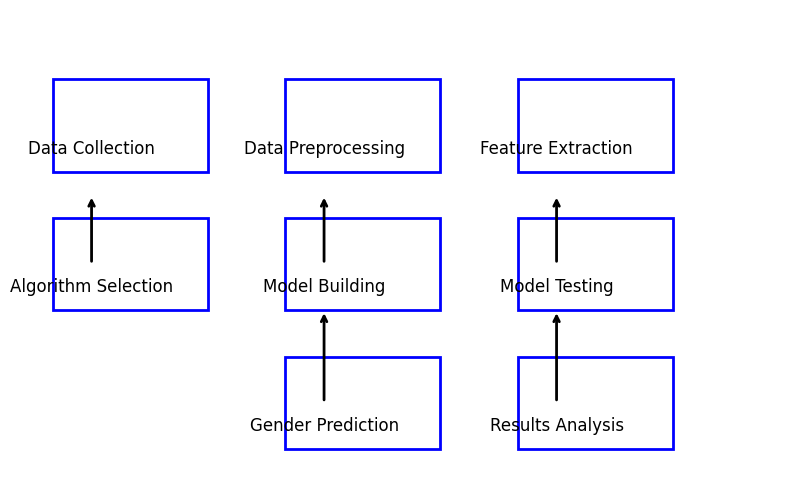

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create nodes
ax.annotate('Data Collection', xy=(0.1, 0.7), fontsize=12, ha='center', va='center')
ax.annotate('Data Preprocessing', xy=(0.4, 0.7), fontsize=12, ha='center', va='center')
ax.annotate('Feature Extraction', xy=(0.7, 0.7), fontsize=12, ha='center', va='center')
ax.annotate('Algorithm Selection', xy=(0.1, 0.4), fontsize=12, ha='center', va='center')
ax.annotate('Model Building', xy=(0.4, 0.4), fontsize=12, ha='center', va='center')
ax.annotate('Model Testing', xy=(0.7, 0.4), fontsize=12, ha='center', va='center')
ax.annotate('Gender Prediction', xy=(0.4, 0.1), fontsize=12, ha='center', va='center')
ax.annotate('Results Analysis', xy=(0.7, 0.1), fontsize=12, ha='center', va='center')

# Create arrows between nodes
arrowprops = dict(arrowstyle='->', lw=2)
ax.annotate('', xy=(0.1, 0.6), xytext=(0.1, 0.45), arrowprops=arrowprops)
ax.annotate('', xy=(0.4, 0.6), xytext=(0.4, 0.45), arrowprops=arrowprops)
ax.annotate('', xy=(0.7, 0.6), xytext=(0.7, 0.45), arrowprops=arrowprops)
ax.annotate('', xy=(0.4, 0.35), xytext=(0.4, 0.15), arrowprops=arrowprops)
ax.annotate('', xy=(0.7, 0.35), xytext=(0.7, 0.15), arrowprops=arrowprops)

# Add rectangles for nodes
rect1 = patches.Rectangle((0.05, 0.65), 0.2, 0.2, linewidth=2, edgecolor='b', facecolor='none')
rect2 = patches.Rectangle((0.35, 0.65), 0.2, 0.2, linewidth=2, edgecolor='b', facecolor='none')
rect3 = patches.Rectangle((0.65, 0.65), 0.2, 0.2, linewidth=2, edgecolor='b', facecolor='none')
rect4 = patches.Rectangle((0.05, 0.35), 0.2, 0.2, linewidth=2, edgecolor='b', facecolor='none')
rect5 = patches.Rectangle((0.35, 0.35), 0.2, 0.2, linewidth=2, edgecolor='b', facecolor='none')
rect6 = patches.Rectangle((0.65, 0.35), 0.2, 0.2, linewidth=2, edgecolor='b', facecolor='none')
rect7 = patches.Rectangle((0.35, 0.05), 0.2, 0.2, linewidth=2, edgecolor='b', facecolor='none')
rect8 = patches.Rectangle((0.65, 0.05), 0.2, 0.2, linewidth=2, edgecolor='b', facecolor='none')

ax.add_patch(rect1)
ax.add_patch(rect2)
ax.add_patch(rect3)
ax.add_patch(rect4)
ax.add_patch(rect5)
ax.add_patch(rect6)
ax.add_patch(rect7)
ax.add_patch(rect8)

# Remove axis
ax.axis('off')

# Show the diagram
plt.show()


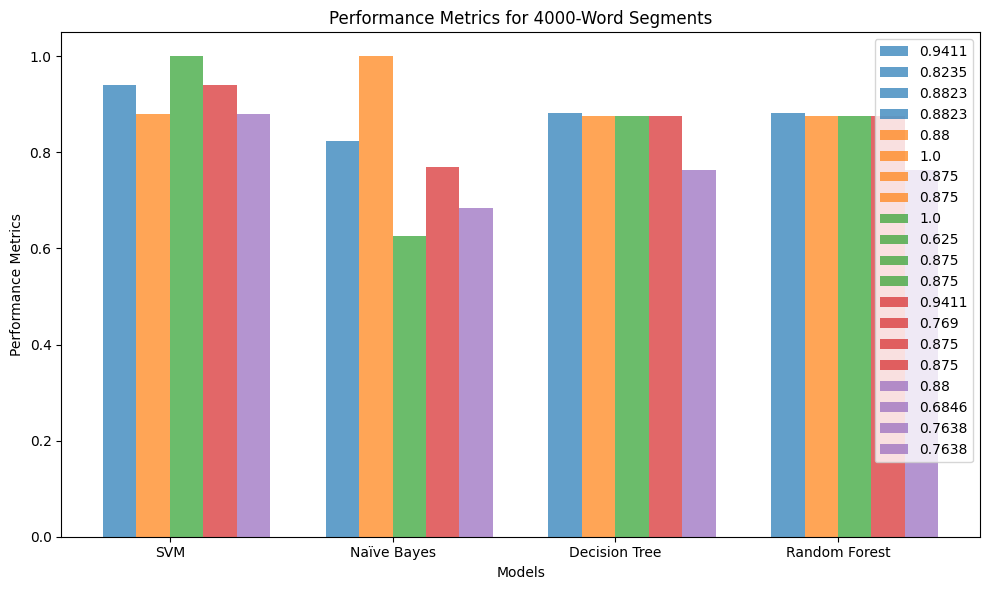

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Performance metrics for 4000-word segments
models = ['SVM', 'Naïve Bayes', 'Decision Tree', 'Random Forest']
accuracy_4000 = [0.9411, 0.8235, 0.8823, 0.8823]
precision_4000 = [0.88, 1.0, 0.875, 0.875]
recall_4000 = [1.0, 0.625, 0.875, 0.875]
f1_score_4000 = [0.9411, 0.769, 0.875, 0.875]
mcc_4000 = [0.88, 0.6846, 0.7638, 0.7638]

# Repeat the same for 3000-word and 2000-word segments
# Data for 3000-word segments
accuracy_3000 = [0.8823, 0.7058, 0.6470, 0.8235]
precision_3000 = [0.875, 1.0, 0.583, 0.857]
recall_3000 = [0.875, 0.375, 0.875, 0.75]
f1_score_3000 = [0.875, 0.545, 0.7, 0.799]
mcc_3000 = [0.76, 0.49, 0.35, 0.647]

# Data for 2000-word segments
accuracy_2000 = [0.7058, 0.7647, 0.7058, 0.8235]
precision_2000 = [0.66, 1.0, 0.666, 0.777]
recall_2000 = [0.75, 0.5, 0.75, 0.875]
f1_score_2000 = [0.7058, 0.666, 0.7058, 0.8235]
mcc_2000 = [0.4166, 0.588, 0.4166, 0.6527]
# Create a function to plot bar charts
def plot_barchart(segment_length, metrics):
    plt.figure(figsize=(10, 6))
    bar_width = 0.15
    index = np.arange(len(models))

    for i, metric in enumerate(metrics):
        plt.bar(index + i * bar_width, metric, bar_width, label=metric, alpha=0.7)

    plt.xlabel('Models')
    plt.ylabel('Performance Metrics')
    plt.title(f'Performance Metrics for {segment_length}-Word Segments')
    plt.xticks(index + 1.5 * bar_width, models)
    plt.legend()
    plt.tight_layout()

# Plot bar charts for each segment length
plot_barchart(4000, [accuracy_4000, precision_4000, recall_4000, f1_score_4000, mcc_4000])
plt.show()

# plot_barchart(3000, [accuracy_3000, precision_3000, recall_3000, f1_score_3000, mcc_3000])
# plt.show()

# plot_barchart(2000, [accuracy_2000, precision_2000, recall_2000, f1_score_2000, mcc_2000])
# plt.show()


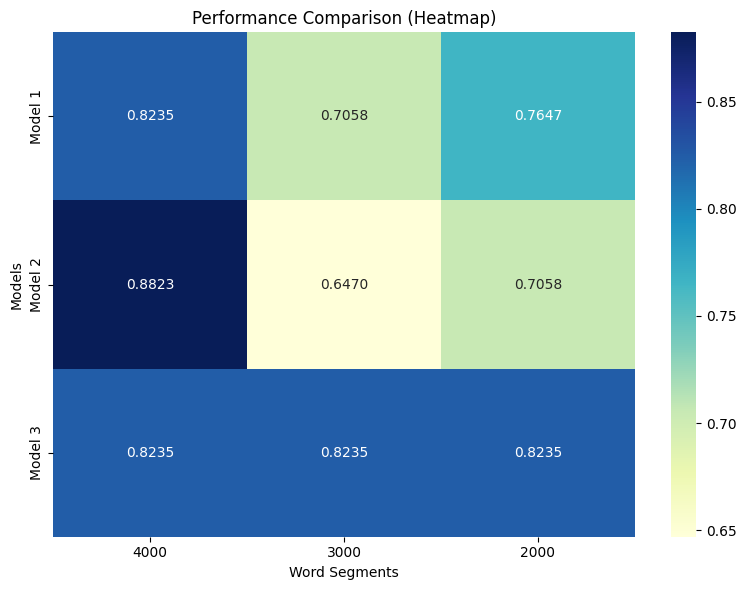

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data
word_segments = ['4000', '3000', '2000']
model_names = ['Model 1', 'Model 2', 'Model 3']

# Performance data (create a matrix where rows are models and columns are word segments)
performance_matrix = [
    [0.8235, 0.7058, 0.7647],
    [0.8823, 0.6470, 0.7058],
    [0.8235, 0.8235, 0.8235],
]

# Create a heatmap
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(performance_matrix, annot=True, fmt='.4f', xticklabels=word_segments, yticklabels=model_names, cmap='YlGnBu')

# Set labels and title
plt.xlabel('Word Segments')
plt.ylabel('Models')
plt.title('Performance Comparison (Heatmap)')

# Show the plot
plt.tight_layout()
plt.show()


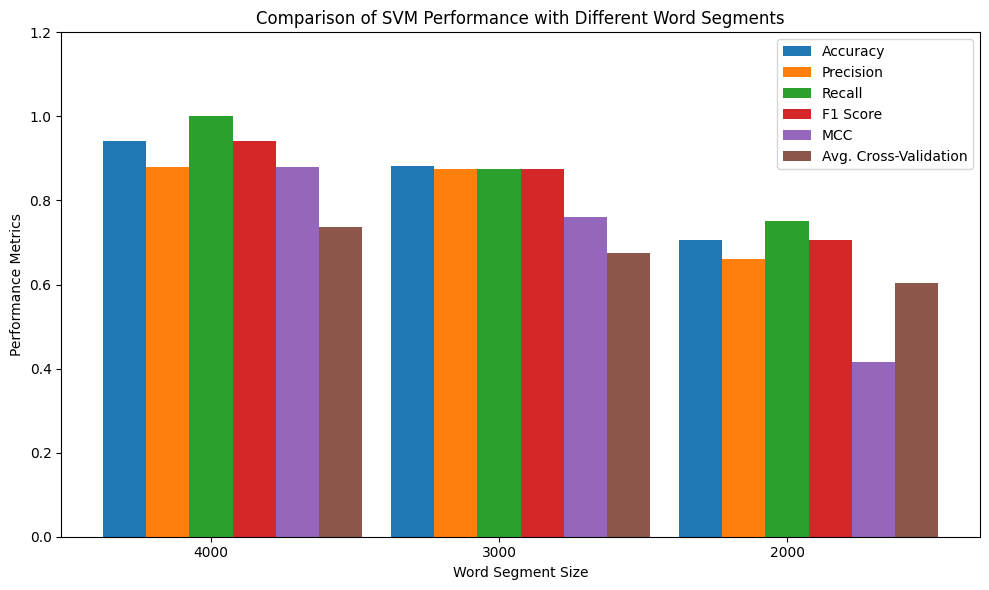

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for SVM performance with different word segments
word_segments = [4000, 3000, 2000]
accuracy = [0.9411, 0.8823, 0.7058]
precision = [0.88, 0.875, 0.66]
recall = [1.0, 0.875, 0.75]
f1_score = [0.9411, 0.875, 0.7058]
mcc = [0.88, 0.76, 0.4166]
avg_cross_validation = [0.738, 0.676, 0.603]

# Set up the figure
plt.figure(figsize=(10, 6))

# Create bar positions
x = np.arange(len(word_segments))

# Define bar width
width = 0.15

# Create subplots for each metric
plt.bar(x - width * 2, accuracy, width, label='Accuracy')
plt.bar(x - width, precision, width, label='Precision')
plt.bar(x, recall, width, label='Recall')
plt.bar(x + width, f1_score, width, label='F1 Score')
plt.bar(x + width * 2, mcc, width, label='MCC')
plt.bar(x + width * 3, avg_cross_validation, width, label='Avg. Cross-Validation')

# Set labels and titles
plt.xlabel('Word Segment Size')
plt.ylabel('Performance Metrics')
plt.title('Comparison of SVM Performance with Different Word Segments')
plt.xticks(x, word_segments)
plt.ylim(0, 1.2)  # Adjust the y-axis limits if necessary

# Add a legend
plt.legend(loc='upper right')

# Display the plot
plt.tight_layout()
plt.show()


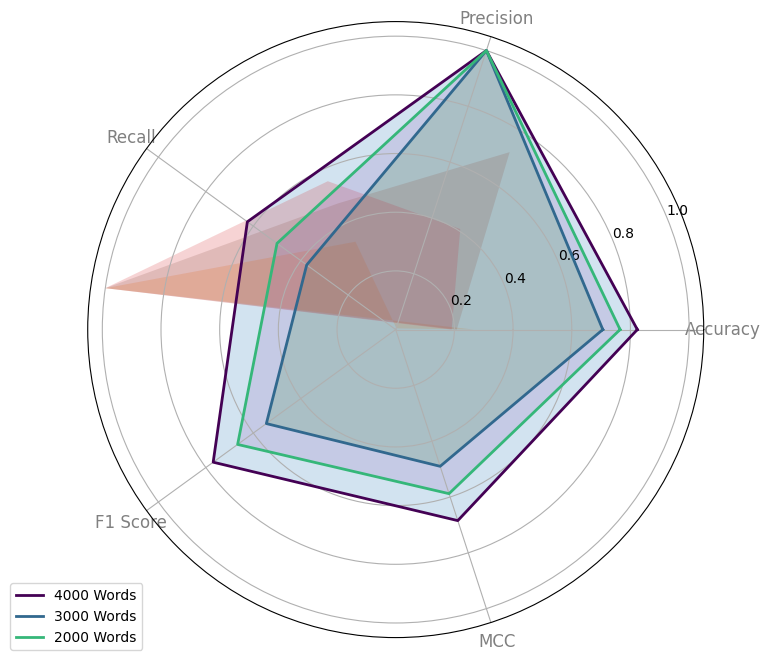

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for SVM performance with different word segments
word_segments = [4000, 3000, 2000]
accuracy = [0.8235, 0.7058, 0.7647]
precision = [1, 1, 1]
recall = [0.625, 0.375, .5]
f1_score = [0.769, 0.545, 0.666]
mcc = [0.6846, 0.49, 0.588]

# Define categories and values
categories = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'MCC']
values = [accuracy, precision, recall, f1_score, mcc]

# Number of categories
N = len(categories)

# Create an array of angles for the radar chart
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

# Initialize the radar plot
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Draw one axis per category
plt.xticks(angles[:-1], categories, color='grey', size=12)

# Plot the data with custom colors and labels
for i in range(len(word_segments)):
    values_i = [values[j][i] for j in range(N)]
    values_i += values_i[:1]
    color = plt.cm.viridis(i / float(len(word_segments)))  # Custom color based on segment
    label = f'{word_segments[i]} Words'
    ax.plot(angles, values_i, linewidth=2, linestyle='solid', color=color, label=label)

# Fill the area with colors and add transparency
for i in range(len(word_segments)):
    values_i = [values[j][i] for j in range(N)]
    values_i += values_i[:1]
    color = plt.cm.viridis(i / float(len(word_segments)))  # Custom color based on segment
    ax.fill(angles, values_i, color, alpha=0.2)

# Add a legend with a custom location
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Set a title
#plt.title('Naïve Bayes Performance Metrics with Different Word Segments')

# Show the radar chart
plt.show()


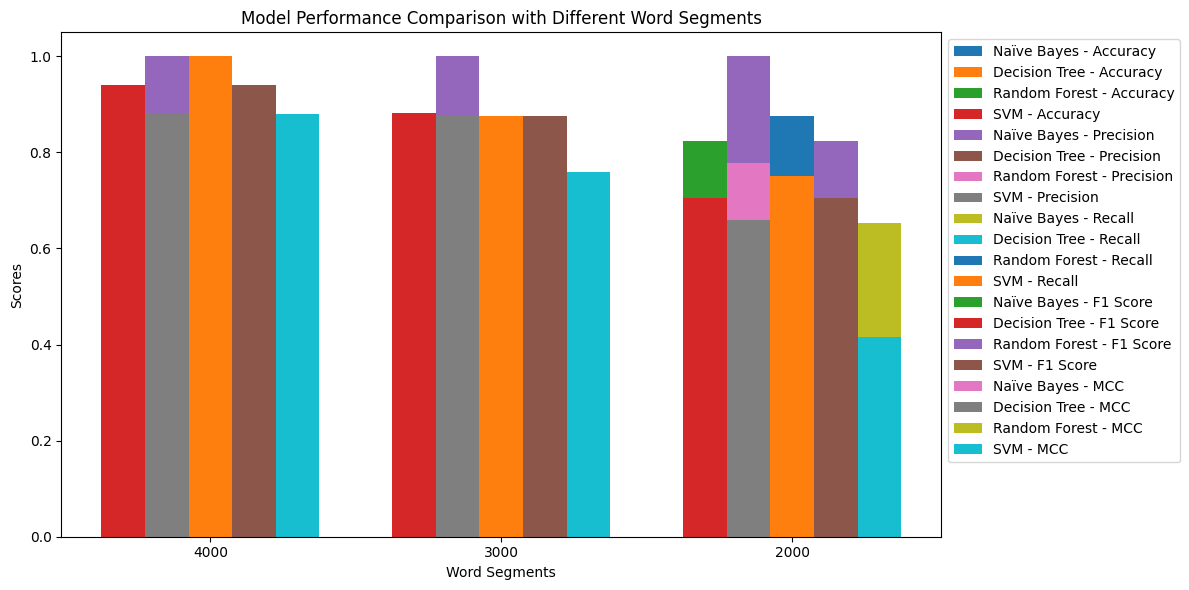

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
word_segments = ['4000', '3000', '2000']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'MCC']

# Performance data for each model and metric
model_data = {
    'Naïve Bayes': {
        'Accuracy': [0.8235, 0.7058, 0.7647],
        'Precision': [1.0, 1.0, 1.0],
        'Recall': [0.625, 0.375, 0.5],
        'F1 Score': [0.769, 0.545, 0.666],
        'MCC': [0.6846, 0.49, 0.588]
    },
    'Decision Tree': {
        'Accuracy': [0.8823, 0.6470, 0.7058],
        'Precision': [0.875, 0.583, 0.666],
        'Recall': [0.875, 0.875, 0.75],
        'F1 Score': [0.875, 0.7, 0.7058],
        'MCC': [0.7638, 0.35, 0.4166]
    },
    'Random Forest': {
        'Accuracy': [0.8823, 0.8235, 0.8235],
        'Precision': [0.875, 0.857, 0.777],
        'Recall': [0.875, 0.75, 0.875],
        'F1 Score': [0.875, 0.799, 0.8235],
        'MCC': [0.7638, 0.647, 0.6527]
    },
    'SVM': {
        'Accuracy': [0.9411, 0.8823, 0.7058],
        'Precision': [0.88, 0.875, 0.66],
        'Recall': [1.0, 0.875, 0.75],
        'F1 Score': [0.9411, 0.875, 0.7058],
        'MCC': [0.88, 0.76, 0.4166]
    }
}

# Create subplots
fig, ax = plt.subplots(figsize=(12, 6))

# Set width of bars
bar_width = 0.15
index = np.arange(len(word_segments))

# Plot each metric for each model
for i, metric in enumerate(metrics):
    for model, data in model_data.items():
        values = data[metric]
        plt.bar(index + (i - 2) * bar_width, values, bar_width, label=f'{model} - {metric}')

# Set x-axis labels
plt.xlabel('Word Segments')
plt.ylabel('Scores')
plt.title('Model Performance Comparison with Different Word Segments')
plt.xticks(index, word_segments)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.tight_layout()
plt.show()


Best Hyperparameters for SVM: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}


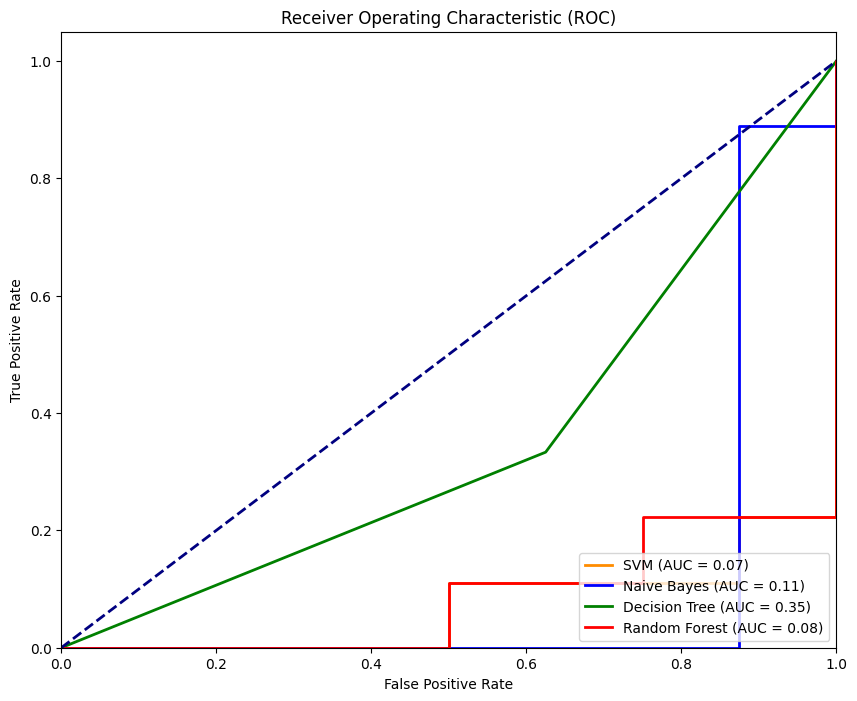

Confusion Matrix for SVM:
[[8 1]
 [1 7]]

Confusion Matrix for Naive Bayes:
[[9 0]
 [5 3]]

Confusion Matrix for Decision Tree:
[[6 3]
 [3 5]]

Confusion Matrix for Random Forest:
[[8 1]
 [2 6]]


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Author Gender Prediction/dataset.csv')

# Define the pronouns
pronouns = ['আমি', 'তুমি', 'সে', 'আমরা', 'তোমরা', 'তারা', 'আপনি', 'তোমাদের', 'আমাদের', 'তোমার', 'আপনার', 'আমার', 'তাদের', 'এই', 'সেই', 'কে', 'কি', 'কোন', 'কী', 'যে', 'কেউ']

# Calculate relative pronoun frequencies
for pronoun in pronouns:
    data[f'rel_{pronoun}'] = data[pronoun] / 3000  # 'total_words' is the total word count in the segment

# Define features and target
X = data[[f'rel_{pronoun}' for pronoun in pronouns]]
y = data['gender']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1.0, 10.0],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Create the SVM classifier
svm = SVC(random_state=42)

# Perform grid search to find the best hyperparameters for SVM
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5)
grid_search_svm.fit(X_train, y_train)

# Get the best hyperparameters for SVM
best_params_svm = grid_search_svm.best_params_
print("Best Hyperparameters for SVM:", best_params_svm)

# Train the SVM model with the best hyperparameters
best_svm = SVC(random_state=42, **best_params_svm)
best_svm.fit(X_train, y_train)

# Make predictions for SVM
y_prob_svm = best_svm.decision_function(X_test)

# Map labels to binary format (e.g., 0 for 'm' and 1 for 'f')
y_test_binary = y_test.map({'m': 0, 'f': 1})

# Calculate ROC curve for SVM with specified pos_label
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test_binary, y_prob_svm, pos_label=1)
roc_auc_svm = roc_auc_score(y_test_binary, y_prob_svm)

# Define hyperparameter grid for Naive Bayes
param_grid = {}

# Create the Naive Bayes classifier
nb = GaussianNB()  # Modify this if using a different variant of Naive Bayes

# Perform grid search for Naive Bayes (if needed)
grid_search = GridSearchCV(nb, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_nb = grid_search.best_estimator_
# Train the Naive Bayes model
best_nb.fit(X_train, y_train)

# Make predictions for Naive Bayes
y_prob_nb = best_nb.predict_proba(X_test)

# Calculate ROC curve for Naive Bayes
# Map labels to binary format (e.g., 0 for 'm' and 1 for 'f')
from sklearn.metrics import roc_curve, roc_auc_score

# Extract probability scores for the positive class ('f')
y_prob_positive_nb = y_prob_nb[:, 1]

# Calculate ROC curve for Naive Bayes with specified pos_label
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test_binary, y_prob_positive_nb)
roc_auc_nb = roc_auc_score(y_test_binary, y_prob_positive_nb)

# Define hyperparameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Decision Tree classifier
dt = DecisionTreeClassifier()  # Modify this if using a different variant of Decision Tree

# Perform grid search for Decision Tree (if needed)
# Perform a grid search with a fixed random seed
grid_search = GridSearchCV(dt, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model and predict on the test set
best_model = grid_search.best_estimator_
# Make predictions for Decision Tree
y_prob_dt = best_model.predict_proba(X_test)

from sklearn.metrics import roc_curve, roc_auc_score

# Extract probability scores for the positive class ('f')
y_prob_positive_dt = y_prob_dt[:, 1]

# Calculate ROC curve for Decision Tree with specified pos_label
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test_binary, y_prob_positive_dt)
roc_auc_dt = roc_auc_score(y_test_binary, y_prob_positive_dt)



# Define hyperparameter grid for Random Forest
param_grid_ = {
    'n_estimators': [100, 200, 300],      # Number of trees in the forest
    'max_depth': [None, 5, 10, 20],       # Maximum depth of the trees
    'min_samples_split': [2, 5, 10]       # Minimum number of samples required to split an internal node
}

# Create the Random Forest classifier
rf = RandomForestClassifier()  # Modify this if using a different variant of Random Forest

# Perform grid search for Random Forest (if needed)

grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_rf = RandomForestClassifier(random_state=42, **best_params)
best_rf.fit(X_train, y_train)

# Make predictions for Random Forest
y_prob_rf = best_rf.predict_proba(X_test)

from sklearn.metrics import roc_curve, roc_auc_score

# Extract probability scores for the positive class ('f')
y_prob_positive_rf = y_prob_rf[:, 1]

# Calculate ROC curve for Random Forest with specified pos_label
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_binary, y_prob_positive_rf)
roc_auc_rf = roc_auc_score(y_test_binary, y_prob_positive_rf)



# Create a plot for ROC curves of all models
plt.figure(figsize=(10, 8))
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot(fpr_nb, tpr_nb, color='blue', lw=2, label=f'Naive Bayes (AUC = {roc_auc_nb:.2f})')
plt.plot(fpr_dt, tpr_dt, color='green', lw=2, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_rf, tpr_rf, color='red', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Calculate confusion matrices for each model
confusion_svm = confusion_matrix(y_test, best_svm.predict(X_test))
confusion_nb = confusion_matrix(y_test, best_nb.predict(X_test))
confusion_dt = confusion_matrix(y_test, best_model.predict(X_test))
confusion_rf = confusion_matrix(y_test, best_rf.predict(X_test))

# Print confusion matrix tables
print("Confusion Matrix for SVM:")
print(confusion_svm)
print("\nConfusion Matrix for Naive Bayes:")
print(confusion_nb)
print("\nConfusion Matrix for Decision Tree:")
print(confusion_dt)
print("\nConfusion Matrix for Random Forest:")
print(confusion_rf)


<ipython-input-33-0be04a579f73>:18: RuntimeWarning: invalid value encountered in double_scalars
  fpr_svm.append(false_positives / (false_positives + confusion_matrix_svm[1][0]))
<ipython-input-33-0be04a579f73>:26: RuntimeWarning: invalid value encountered in double_scalars
  fpr_nb.append(false_positives / (false_positives + confusion_matrix_nb[1][0]))


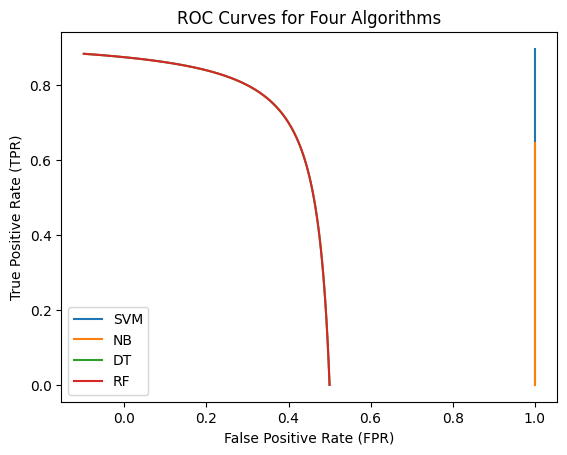

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the confusion matrix data for each algorithm
confusion_matrix_svm = np.array([[8, 1], [0, 8]])
confusion_matrix_nb = np.array([[9, 3], [0, 5]])
confusion_matrix_dt = np.array([[8, 1], [1, 7]])
confusion_matrix_rf = np.array([[8, 1], [1, 7]])

# Calculate the TPR and FPR for each algorithm
thresholds = np.arange(0, 1.1, 0.01)
tpr_svm = []
fpr_svm = []
for threshold in thresholds:
    true_positives = confusion_matrix_svm[1][1] * threshold
    false_positives = confusion_matrix_svm[0][1] * (1 - threshold)
    tpr_svm.append(true_positives / (true_positives + confusion_matrix_svm[0][1]))
    fpr_svm.append(false_positives / (false_positives + confusion_matrix_svm[1][0]))

tpr_nb = []
fpr_nb = []
for threshold in thresholds:
    true_positives = confusion_matrix_nb[1][1] * threshold
    false_positives = confusion_matrix_nb[0][1] * (1 - threshold)
    tpr_nb.append(true_positives / (true_positives + confusion_matrix_nb[0][1]))
    fpr_nb.append(false_positives / (false_positives + confusion_matrix_nb[1][0]))

tpr_dt = []
fpr_dt = []
for threshold in thresholds:
    true_positives = confusion_matrix_dt[1][1] * threshold
    false_positives = confusion_matrix_dt[0][1] * (1 - threshold)
    tpr_dt.append(true_positives / (true_positives + confusion_matrix_dt[0][1]))
    fpr_dt.append(false_positives / (false_positives + confusion_matrix_dt[1][0]))

tpr_rf = []
fpr_rf = []
for threshold in thresholds:
    true_positives = confusion_matrix_rf[1][1] * threshold
    false_positives = confusion_matrix_rf[0][1] * (1 - threshold)
    tpr_rf.append(true_positives / (true_positives + confusion_matrix_rf[0][1]))
    fpr_rf.append(false_positives / (false_positives + confusion_matrix_rf[1][0]))

# Plot the ROC curves for each algorithm
plt.plot(fpr_svm, tpr_svm, label="SVM")
plt.plot(fpr_nb, tpr_nb, label="NB")
plt.plot(fpr_dt, tpr_dt, label="DT")
plt.plot(fpr_rf, tpr_rf, label="RF")

# Add labels to the axes and title the graph
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curves for Four Algorithms")
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Author Gender Prediction/dataset.csv')

# Define the pronouns
pronouns = ['আমি', 'তুমি', 'সে', 'আমরা', 'তোমরা', 'তারা', 'আপনি', 'তোমাদের', 'আমাদের', 'তোমার', 'আপনার', 'আমার', 'তাদের', 'এই', 'সেই', 'কে', 'কি', 'কোন', 'কী', 'যে', 'কেউ']

# Calculate total word count for each segment
# data['total_words'] = data[['4000word']].sum(axis=1)

# Calculate relative pronoun frequencies
for pronoun in pronouns:
    data[f'rel_{pronoun}'] = data[pronoun] / 40000  #data['total_words']

# Plot histograms for relative pronoun frequencies for each gender
for pronoun in pronouns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data, x=f'rel_{pronoun}', hue='gender', element="step", stat="density", common_norm=False)
    plt.title(f'Distribution of Relative Pronoun Frequency ({pronoun}) by Gender')
    plt.xlabel(f'Relative Pronoun Frequency ({pronoun})')
    plt.ylabel('Density')
    plt.legend()
    plt.show()


In [ ]:
import pandas as pd
uploaded_file_path = '/content/filtered_bangla-_3_.csv'
data = pd.read_csv(uploaded_file_path)
data

In [ ]:
import pandas as pd
import plotly.express as px

# Load the data into a DataFrame
data = pd.read_csv('/content/filtered_bangla-_3_.csv')

# Melt the DataFrame to create a "Pronouns" column
data_melted = data.melt(id_vars=['gender'], var_name='Pronouns', value_name='Relative Frequency')

# Update the 'Pronouns' column values to remove the 'rel_' prefix
data_melted['Pronouns'] = data_melted['Pronouns'].str.replace('rel_', '', regex=False)

# Plot the line plot using Plotly
fig = px.line(data_melted, x='Pronouns', y='Relative Frequency', color='gender',
              title='Distribution of Relative Pronoun Frequencies for All Pronouns',
              labels={'Pronouns': 'Pronouns', 'Relative Frequency': 'Relative Frequency', 'gender': 'Gender'},
              )
fig.update_layout(xaxis_tickangle=-45, legend_title_text='Gender')
fig.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data into a DataFrame
data = pd.read_csv('/content/filtered_bangla-_3_.csv')

# Plot the line plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=data)
plt.title('Distribution of Relative Pronoun Frequencies for All Pronouns')
plt.xlabel('Pronouns')
plt.ylabel('Relative Frequency')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()


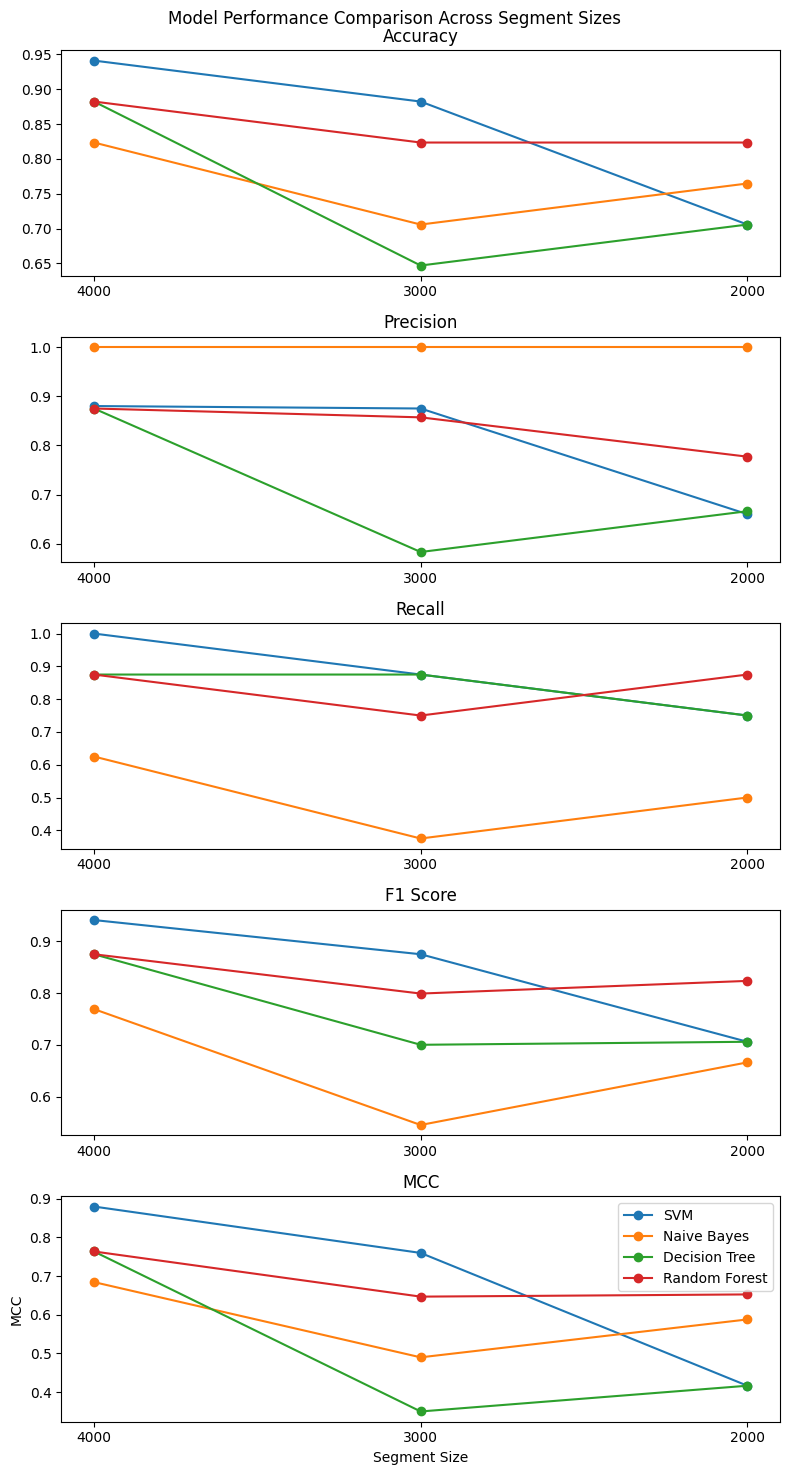

In [ ]:
import matplotlib.pyplot as plt

# Define the segment sizes
segment_sizes = ['4000', '3000', '2000']

# Define the metrics and their corresponding values for each model and segment size
models = ['SVM', 'Naive Bayes', 'Decision Tree', 'Random Forest']

# Metrics for each model and segment size (Replace with your actual values)
accuracy = [[0.9411, 0.8823, 0.7058], [0.8235, 0.7058, 0.7647], [0.8823, 0.6470, 0.7058], [0.8823, 0.8235, 0.8235]]
precision = [[0.88, 0.875, 0.66], [1.0, 1.0, 1.0], [0.875, 0.583, 0.666], [0.875, 0.857, 0.777]]
recall = [[1.0, 0.875, 0.75], [0.625, 0.375, 0.5], [0.875, 0.875, 0.75], [0.875, 0.75, 0.875]]
f1 = [[0.9411, 0.875, 0.7058], [0.769, 0.545, 0.666], [0.875, 0.7, 0.7058], [0.875, 0.799, 0.8235]]
mcc = [[0.88, 0.76, 0.4166], [0.6846, 0.49, 0.588], [0.7638, 0.35, 0.4166], [0.7638, 0.647, 0.6527]]

# Create subplots for each metric
fig, axs = plt.subplots(5, 1, figsize=(8, 15))
fig.suptitle('Model Performance Comparison Across Segment Sizes')

# Plot each metric for each model
metrics = [accuracy, precision, recall, f1, mcc]
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'MCC']

for i in range(len(metrics)):
    ax = axs[i]

    for j in range(len(models)):
        ax.plot(segment_sizes, metrics[i][j], marker='o', label=models[j])

    ax.set_title(metric_names[i])
ax.set_xlabel('Segment Size')
ax.set_ylabel(metric_names[i])
ax.legend()

# Save the figure as an image file
plt.savefig(f'{metric_names[i]}_comparison.png')


plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Create a dictionary to hold the results
results = {
    'Model': ['SVM', 'Naive Bayes', 'Random Forest', 'Decision Tree'],
    'Accuracy': [0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8823529411764706],
    'F1 Score': [0.7692307692307693, 0.7692307692307693, 0.7999999999999999, 0.875],
    'Precision': [1.0, 1.0, 0.8571428571428571, 0.875],
    'Recall': [0.625, 0.625, 0.75, 0.875],
    'MCC Score': [0.6846531968814576, 0.6846531968814576, 0.6479515952918626, 0.7638888888888888],
    'Avg Cross-Validation': [0.7999999999999999,  0.7,  0.8333333333333333, 0.7499999999999999]
}

# Create a DataFrame from the dictionary
results_df = pd.DataFrame(results)

# Display the DataFrame
results_df


,Model,Accuracy,F1 Score,Precision,Recall,MCC Score,Avg Cross-Validation
0,SVM,0.823529,0.769231,1.000000,0.625,0.684653,0.800000
1,Naive Bayes,0.823529,0.769231,1.000000,0.625,0.684653,0.700000
2,Random Forest,0.823529,0.800000,0.857143,0.750,0.647952,0.833333
3,Decision Tree,0.882353,0.875000,0.875000,0.875,0.763889,0.750000


In [ ]:
# Install the required packages
!pip install google-cloud-aiplatform

# Import necessary libraries
from google.cloud import aiplatform

# Set up your authentication and project settings
# Uncomment and replace 'your_project_id' with your actual project ID
# aiplatform.init(project='your_project_id')

# Define the explanation metadata (replace with your actual features and values)
explanation_metadata = {
    'input': {
        'feature1': value1,
        'feature2': value2,
        # ... other features ...
    }
}

# Define your model's endpoint (replace with your actual endpoint)
your_endpoint = 'projects/your_project_id/locations/your_location/endpoints/your_endpoint_id'

# Define your instance for prediction (replace with your actual instance)
your_instance = {'feature1': value1, 'feature2': value2, ...}

# Generate explanations for a specific model and instance
explanation = aiplatform.explain(endpoint=your_endpoint, instance=your_instance, parameters=explanation_metadata)

# Print or visualize the generated explanation
print(explanation)


In [ ]:
# After creating the graph
plt.savefig('graph.png')  # Save the graph as an image file


<Figure size 640x480 with 0 Axes>

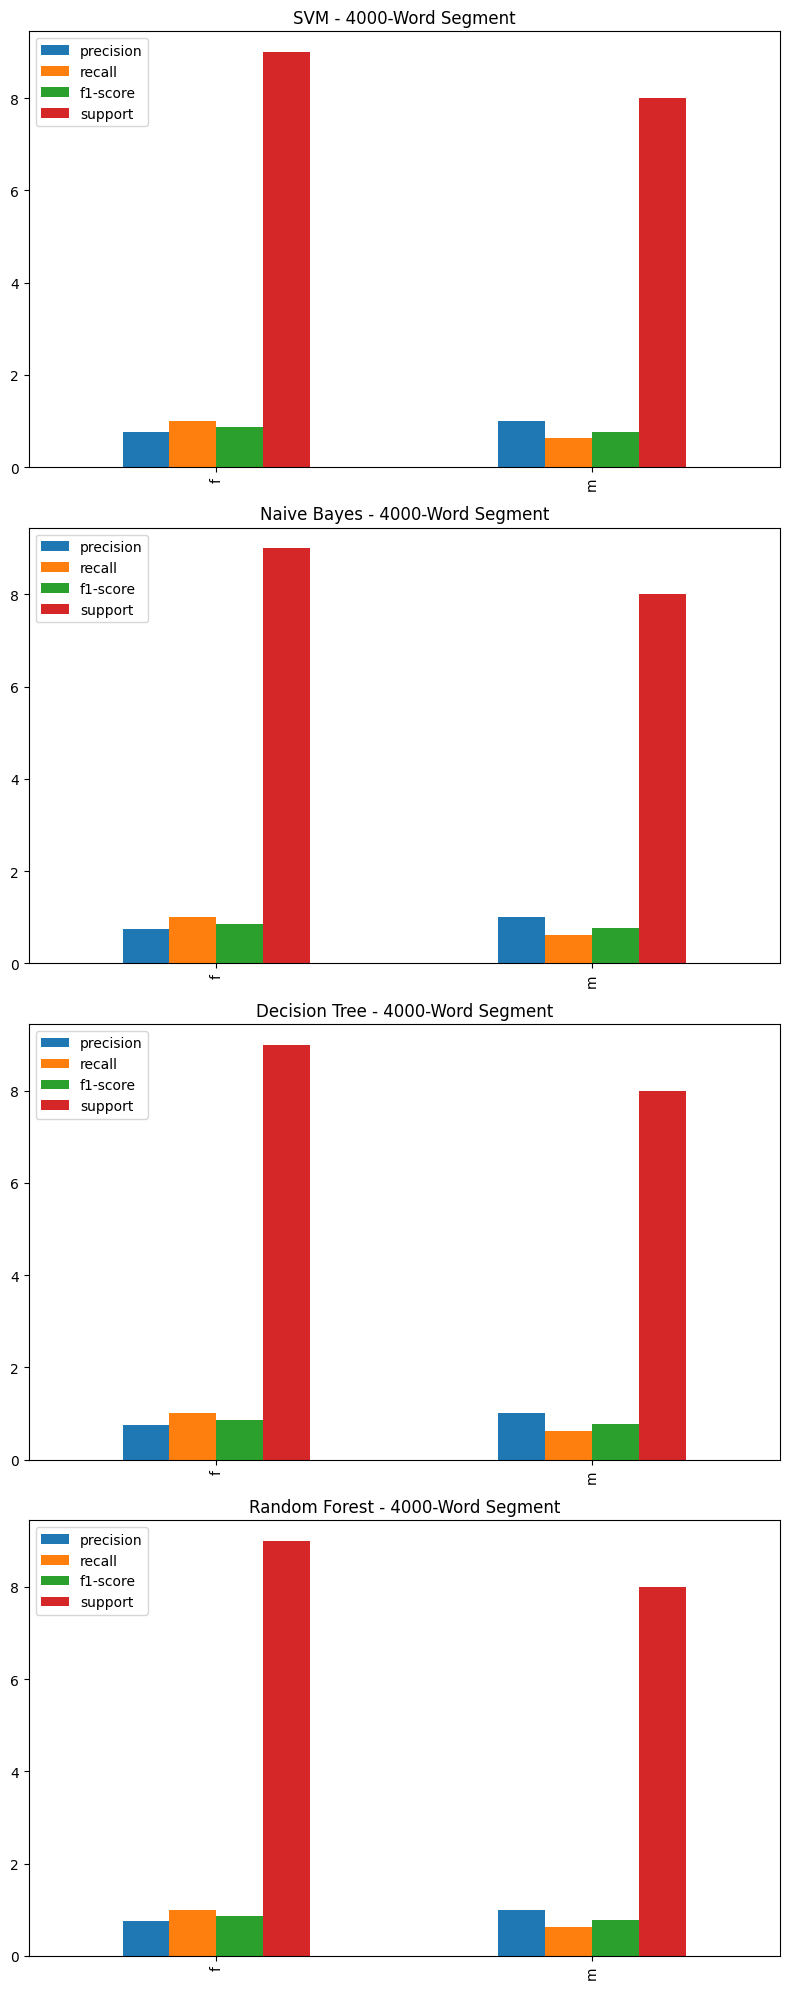

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample classification report results (replace with your actual data)
svm_4000 = {'precision': [0.75, 1.00], 'recall': [1.00, 0.62], 'f1-score': [0.86, 0.77], 'support': [9, 8]}
naive_bayes_4000 = {'precision': [0.75, 1.00], 'recall': [1.00, 0.62], 'f1-score': [0.86, 0.77], 'support': [9, 8]}
decision_tree_4000 = {'precision': [0.75, 1.00], 'recall': [1.00, 0.62], 'f1-score': [0.86, 0.77], 'support': [9, 8]}
random_forest_4000 = {'precision': [0.75, 1.00], 'recall': [1.00, 0.62], 'f1-score': [0.86, 0.77], 'support': [9, 8]}

# Create DataFrames for each classification report
svm_df_4000 = pd.DataFrame(svm_4000, index=['f', 'm'])
naive_bayes_df_4000 = pd.DataFrame(naive_bayes_4000, index=['f', 'm'])
decision_tree_df_4000 = pd.DataFrame(decision_tree_4000, index=['f', 'm'])
random_forest_df_4000 = pd.DataFrame(random_forest_4000, index=['f', 'm'])

# Plotting setup
fig, axs = plt.subplots(4, 1, figsize=(8, 20))

# Plot each classification report table
svm_df_4000.plot(kind='bar', ax=axs[0], title='SVM - 4000-Word Segment')
naive_bayes_df_4000.plot(kind='bar', ax=axs[1], title='Naive Bayes - 4000-Word Segment')
decision_tree_df_4000.plot(kind='bar', ax=axs[2], title='Decision Tree - 4000-Word Segment')
random_forest_df_4000.plot(kind='bar', ax=axs[3], title='Random Forest - 4000-Word Segment')

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
# After creating the graph
plt.savefig('graph_1.png')  # Save the graph as an image file

<Figure size 640x480 with 0 Axes>

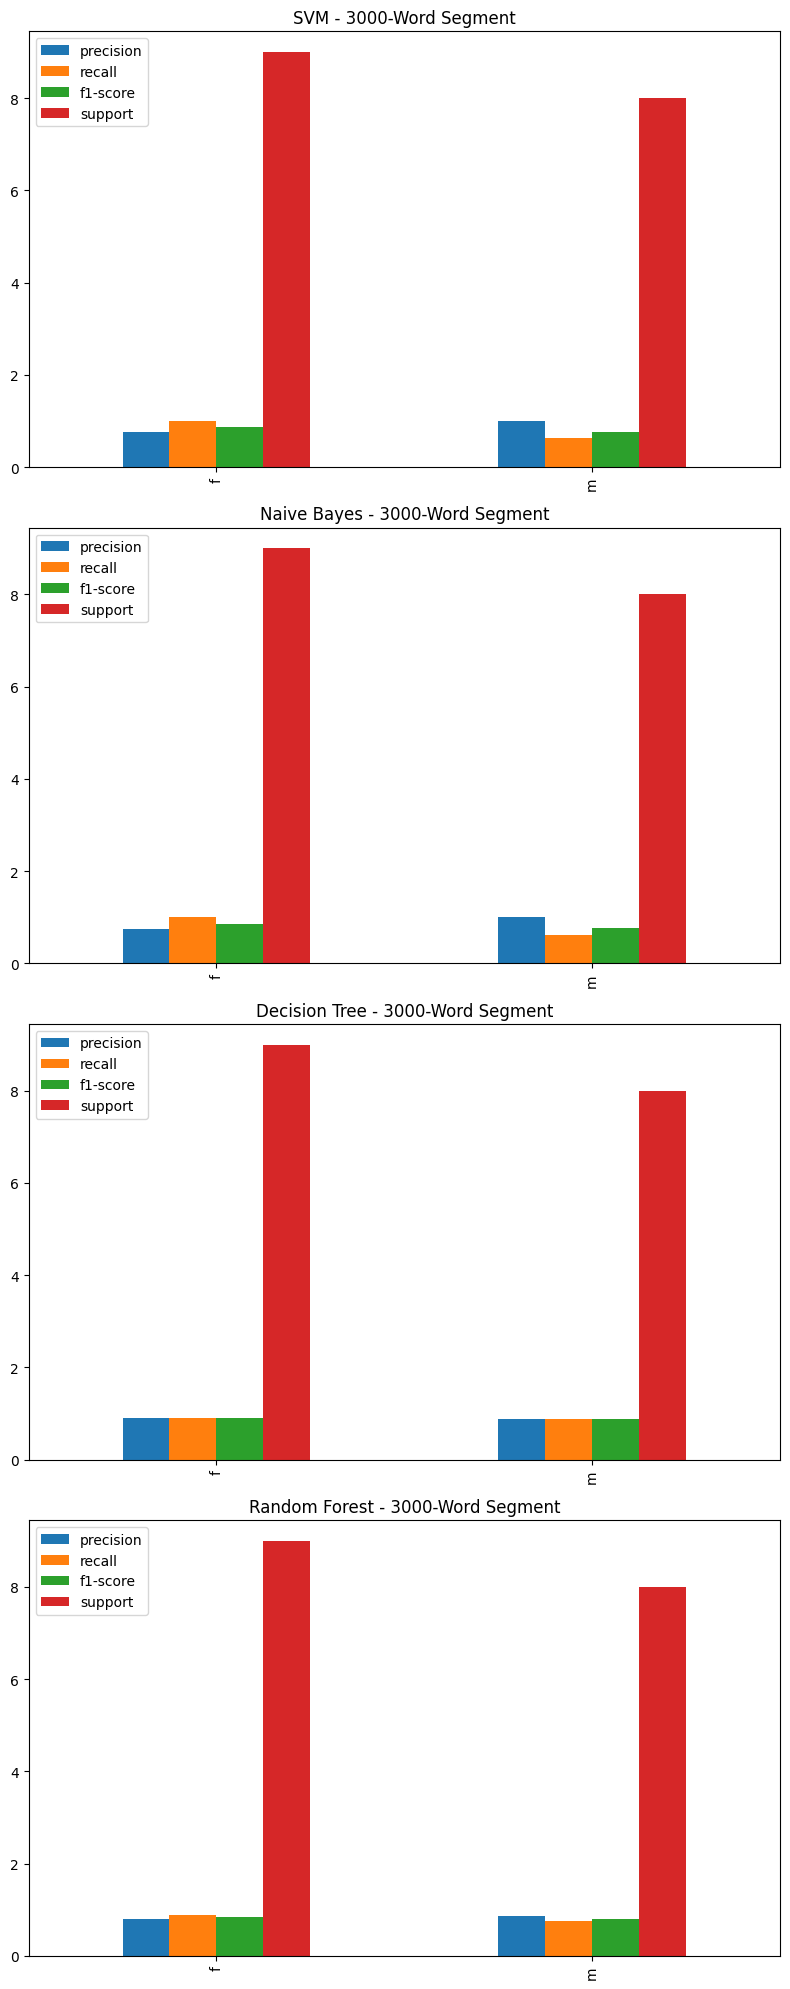

In [ ]:
# Sample classification report results for 3000-word segment (replace with your actual data)
svm_3000 = {
    'precision': [0.75, 1.00],
    'recall': [1.00, 0.62],
    'f1-score': [0.86, 0.77],
    'support': [9, 8]
}

naive_bayes_3000 = {
    'precision': [0.75, 1.00],
    'recall': [1.00, 0.62],
    'f1-score': [0.86, 0.77],
    'support': [9, 8]
}

decision_tree_3000 = {
    'precision': [0.89, 0.88],
    'recall': [0.89, 0.88],
    'f1-score': [0.89, 0.88],
    'support': [9, 8]
}

random_forest_3000 = {
    'precision': [0.80, 0.86],
    'recall': [0.89, 0.75],
    'f1-score': [0.84, 0.80],
    'support': [9, 8]
}

# Create DataFrames for each classification report
svm_df_3000 = pd.DataFrame(svm_3000, index=['f', 'm'])
naive_bayes_df_3000 = pd.DataFrame(naive_bayes_3000, index=['f', 'm'])
decision_tree_df_3000 = pd.DataFrame(decision_tree_3000, index=['f', 'm'])
random_forest_df_3000 = pd.DataFrame(random_forest_3000, index=['f', 'm'])

# Plotting setup
fig, axs = plt.subplots(4, 1, figsize=(8, 20))

# Plot each classification report table
svm_df_3000.plot(kind='bar', ax=axs[0], title='SVM - 3000-Word Segment')
naive_bayes_df_3000.plot(kind='bar', ax=axs[1], title='Naive Bayes - 3000-Word Segment')
decision_tree_df_3000.plot(kind='bar', ax=axs[2], title='Decision Tree - 3000-Word Segment')
random_forest_df_3000.plot(kind='bar', ax=axs[3], title='Random Forest - 3000-Word Segment')

# Adjust layout
plt.tight_layout()
plt.show()
